<a href="https://colab.research.google.com/github/hassan-ali786/Deep-learning-/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3843 - loss: 1.6885 - val_accuracy: 0.5743 - val_loss: 1.2178
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.5968 - loss: 1.1552 - val_accuracy: 0.6319 - val_loss: 1.0765
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.6595 - loss: 0.9857 - val_accuracy: 0.6593 - val_loss: 0.9834
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.6855 - loss: 0.8987 - val_accuracy: 0.6610 - val_loss: 0.9755
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7130 - loss: 0.8200 - val_accuracy: 0.6755 - val_loss: 0.9484
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.7378 - loss: 0.7625 - val_accuracy: 0.6931 - val_loss: 0.8956
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7529 - loss: 0.7077 - val_accuracy: 0.6907 - val_loss: 0.9025
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7702 -

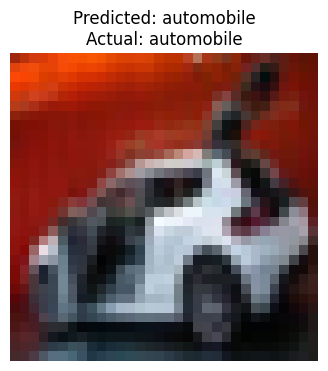

Image Index: 6
Predicted Class Index: 1
Predicted Class Name: automobile
Actual Class Name: automobile


In [ ]:
# ---
# Project: CIFAR-10 Image Classification using CNN
# Description: A simple neural network to identify images of 10 different objects.
# ---

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. LOAD DATASET
# CIFAR-10 is built into Keras, so we can download it easily
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 2. PREPROCESS DATA
# Normalize pixel values to be between 0 and 1 (helps the model learn faster)
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 3. BUILD THE CNN MODEL
model = models.Sequential([
    # First Convolutional Layer: Extracts basic features like edges
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer: Extracts more complex patterns
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flattening: Converting 2D images into a 1D vector for the Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) # 10 output nodes for 10 classes
])

# 4. COMPILE THE MODEL
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 5. TRAIN THE MODEL
# We will run for 10 epochs (10 passes through the data)
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


# 6. EVALUATE THE MODEL
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc*100:.2f}%')


# 7. MAKE PREDICTION ON A SINGLE IMAGE USING INDEX

import numpy as np

def predict_and_plot(index):
    """
    Takes an image index from test dataset,
    plots the image,
    and prints predicted & actual class name.
    """

    # Get image and label
    image = test_images[index]
    true_label = test_labels[index][0]

    # Model expects batch dimension, so expand dims
    image_input = np.expand_dims(image, axis=0)

    # Make prediction
    predictions = model.predict(image_input)
    predicted_class = np.argmax(predictions)

    # Plot image
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')
    plt.title(
        f"Predicted: {class_names[predicted_class]}\n"
        f"Actual: {class_names[true_label]}"
    )
    plt.show()

    # Print details
    print("Image Index:", index)
    print("Predicted Class Index:", predicted_class)
    print("Predicted Class Name:", class_names[predicted_class])
    print("Actual Class Name:", class_names[true_label])


# 🔹 Example usage
predict_and_plot(6)